In [1]:
# Summary of this project (regression)
# --------------------------------- 

# 1) Data collection from 

# 2) Analyze the data
 

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import math 
import tensorflow as tf
import pandas_ta as ta
import pandas_datareader as web 
import matplotlib.pyplot as plt 

In [3]:
# Download Apple stock data
# -----------------------------------------------

stock_ticker = yf.Ticker("AAPL")
stock_data = stock_ticker.history(period="max")
# Convert the index to a datetime object
stock_data.index = pd.to_datetime(stock_data.index)

# Format the datetime index to "YYYY-MM-DD"
stock_data.index = stock_data.index.strftime('%Y-%m-%d')

# convert to lowercase comlumn name 
stock_data.columns = [c.lower() for c in stock_data.columns]

# Convert  indexes to datetime just to be sure
stock_data.index = pd.to_datetime(stock_data.index)

del stock_data["dividends"]
del stock_data["stock splits"]
del stock_data["volume"]

In [4]:
stock_data

,open,high,low,close
Date,,,,
1980-12-12,0.098943,0.099373,0.098943,0.098943
1980-12-15,0.094211,0.094211,0.093781,0.093781
1980-12-16,0.087328,0.087328,0.086898,0.086898
1980-12-17,0.089049,0.089479,0.089049,0.089049
1980-12-18,0.091630,0.092061,0.091630,0.091630
...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999
2024-08-13,219.009995,221.889999,219.009995,221.270004
2024-08-14,220.570007,223.029999,219.699997,221.720001


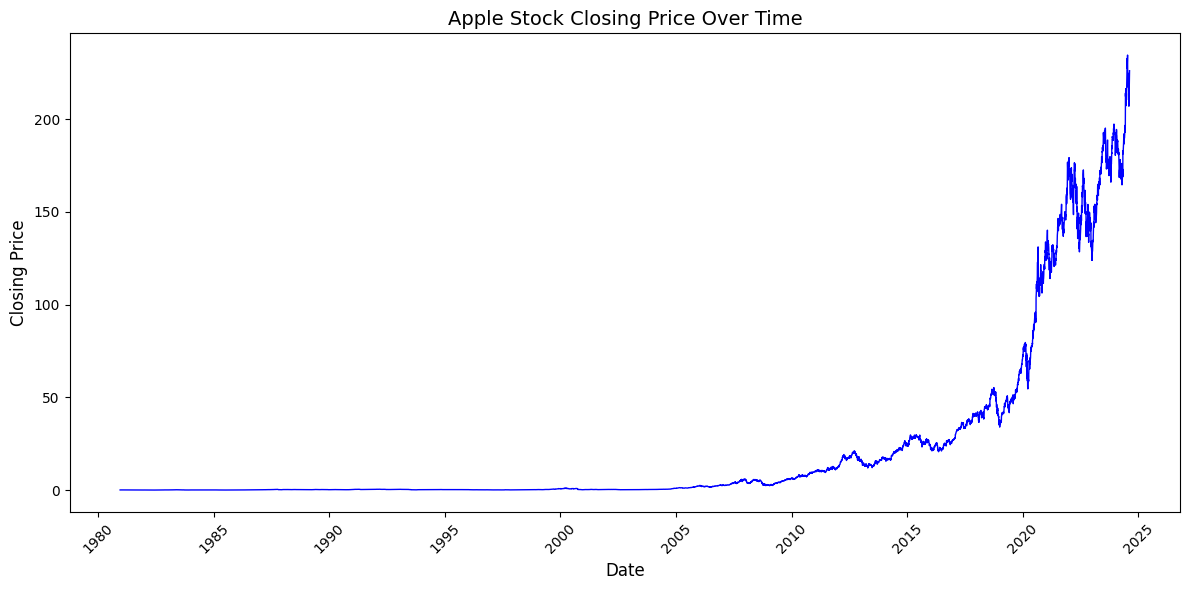

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['close'], linestyle='-', color='b', linewidth=1)
plt.title('Apple Stock Closing Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# inspect the data see the correlation between each column 

# Calculate the correlation matrix
correlation_matrix = stock_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# To focus specifically on how each column correlates with 'close'
close_correlations = correlation_matrix['close']

# Print the correlations with the 'close' column
print("\nCorrelation with 'close':")
print(close_correlations)

Correlation Matrix:
           open      high       low     close
open   1.000000  0.999943  0.999942  0.999874
high   0.999943  1.000000  0.999923  0.999942
low    0.999942  0.999923  1.000000  0.999941
close  0.999874  0.999942  0.999941  1.000000

Correlation with 'close':
open     0.999874
high     0.999942
low      0.999941
close    1.000000
Name: close, dtype: float64


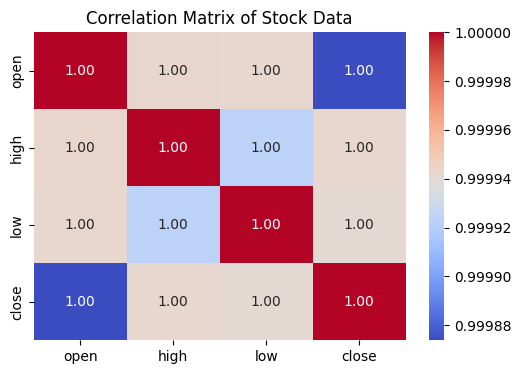

In [7]:
import seaborn as sns

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Data')
plt.show()

In [8]:
# view outliers 
# --------------------------------------------

from scipy import stats

# Calculate Z-scores
stock_data['z_score'] = stats.zscore(stock_data['close'])

# Define outliers as those with Z-scores > 3 or < -3
outliers = stock_data[(stock_data['z_score'] > 3) | (stock_data['z_score'] < -3)]

# Print number of outliers and the outliers themselves
print(f'Number of outliers: {outliers.shape[0]}')
print(outliers)

Number of outliers: 454
                  open        high         low       close   z_score
Date                                                                
2021-11-30  157.584669  163.031528  157.515714  162.814835  3.065327
2021-12-01  164.962065  167.739676  162.056419  162.292816  3.053985
2021-12-02  156.353442  161.731346  155.427572  161.297958  3.032371
2021-12-06  161.819990  165.356028  161.810146  162.834518  3.065754
2021-12-07  166.538026  169.000441  165.809146  168.606445  3.191156
...                ...         ...         ...         ...       ...
2024-08-12  216.070007  219.509995  215.600006  217.529999  4.254078
2024-08-13  219.009995  221.889999  219.009995  221.270004  4.335334
2024-08-14  220.570007  223.029999  219.699997  221.720001  4.345111
2024-08-15  224.600006  225.350006  222.759995  224.720001  4.410289
2024-08-16  223.919998  226.827103  223.650101  226.115005  4.440597

[454 rows x 5 columns]


In [9]:
# Filter data for dates from 2019 onwards

del stock_data["z_score"]
stock_data_filtered = stock_data[stock_data.index.year >= 2019]

stock_data_filtered

,open,high,low,close
Date,,,,
2019-01-02,37.025780,37.972402,36.868009,37.750088
2019-01-03,34.417793,34.833733,33.944483,33.989902
2019-01-04,34.549267,35.510232,34.374765,35.440907
2019-01-07,35.546085,35.577162,34.876756,35.362019
2019-01-08,35.751664,36.291910,35.503058,36.036129
...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999
2024-08-13,219.009995,221.889999,219.009995,221.270004
2024-08-14,220.570007,223.029999,219.699997,221.720001


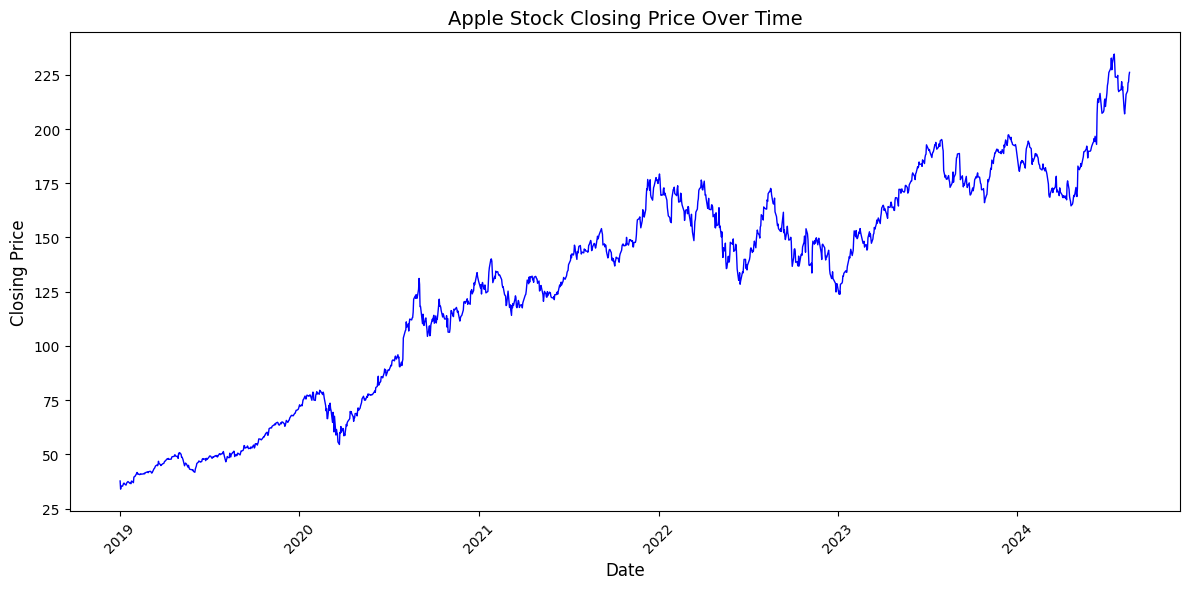

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data_filtered.index, stock_data_filtered['close'], linestyle='-', color='b', linewidth=1)
plt.title('Apple Stock Closing Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Calculate Z-scores
stock_data_filtered['z_score'] = stats.zscore(stock_data_filtered['close'])

# Define outliers as those with Z-scores > 3 or < -3
outliers = stock_data_filtered[(stock_data_filtered['z_score'] > 3) | (stock_data_filtered['z_score'] < -3)]

# Print number of outliers and the outliers themselves
print(f'Number of outliers: {outliers.shape[0]}')
print(outliers)

Number of outliers: 0
Empty DataFrame
Columns: [open, high, low, close, z_score]
Index: []


C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\3148896026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['z_score'] = stats.zscore(stock_data_filtered['close'])


In [12]:
# data from 2019 onwards to avoid extreme outliers 
del stock_data_filtered["z_score"]

stock_data_filtered

,open,high,low,close
Date,,,,
2019-01-02,37.025780,37.972402,36.868009,37.750088
2019-01-03,34.417793,34.833733,33.944483,33.989902
2019-01-04,34.549267,35.510232,34.374765,35.440907
2019-01-07,35.546085,35.577162,34.876756,35.362019
2019-01-08,35.751664,36.291910,35.503058,36.036129
...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999
2024-08-13,219.009995,221.889999,219.009995,221.270004
2024-08-14,220.570007,223.029999,219.699997,221.720001


In [13]:
# Feature Engineering 
# - adding new feature 
# ---------------------------------

# Adding indicators to the stock data

# Example: Calculate 10-day and 50-day SMAs
stock_data_filtered['SMA_10'] = stock_data_filtered['close'].rolling(window=10).mean()
stock_data_filtered['SMA_50'] = stock_data_filtered['close'].rolling(window=50).mean()

# Example: Calculate 10-day and 50-day EMAs
stock_data_filtered['EMA_10'] = stock_data_filtered['close'].ewm(span=10, adjust=False).mean()
stock_data_filtered['EMA_50'] = stock_data_filtered['close'].ewm(span=50, adjust=False).mean()

# Calculate 14-day RSI using pandas_ta
stock_data_filtered['RSI_14'] = ta.rsi(stock_data_filtered['close'], length=14)

stock_data_filtered = stock_data_filtered.dropna()


C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\437301792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['SMA_10'] = stock_data_filtered['close'].rolling(window=10).mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\437301792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['SMA_50'] = stock_data_filtered['close'].rolling(window=50).mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\437301792.py:12: SettingWithCopyWarning: 
A value is trying to be set 

In [14]:
stock_data_filtered

,open,high,low,close,SMA_10,SMA_50,EMA_10,EMA_50,RSI_14
Date,,,,,,,,,
2019-03-14,44.149023,44.197040,43.827329,44.108212,42.529270,39.632642,42.745325,40.479822,75.107552
2019-03-15,44.377097,44.972471,44.110618,44.681984,42.796949,39.771280,43.097445,40.644613,77.641921
2019-03-18,44.605173,45.226955,44.602769,45.138130,43.089116,39.994245,43.468479,40.820829,79.434547
2019-03-19,45.217349,45.370994,44.633975,44.780418,43.353194,40.181035,43.707013,40.976107,74.396942
2019-03-20,44.708399,45.491032,44.348293,45.171738,43.680652,40.377229,43.973327,41.140642,76.176846
...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,215.026291,215.036933,215.388954,212.398070,51.083445
2024-08-13,219.009995,221.889999,219.009995,221.270004,215.298587,215.621778,216.458236,212.745989,55.570009
2024-08-14,220.570007,223.029999,219.699997,221.720001,215.288263,216.180065,217.414921,213.097911,56.091835


In [15]:
# Move 'close' column to the last position
columns = [col for col in stock_data_filtered.columns if col != 'close'] + ['close']
stock_data_filtered = stock_data_filtered[columns]
 
# Print the updated DataFrame
stock_data_filtered

,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,RSI_14,close
Date,,,,,,,,,
2019-03-14,44.149023,44.197040,43.827329,42.529270,39.632642,42.745325,40.479822,75.107552,44.108212
2019-03-15,44.377097,44.972471,44.110618,42.796949,39.771280,43.097445,40.644613,77.641921,44.681984
2019-03-18,44.605173,45.226955,44.602769,43.089116,39.994245,43.468479,40.820829,79.434547,45.138130
2019-03-19,45.217349,45.370994,44.633975,43.353194,40.181035,43.707013,40.976107,74.396942,44.780418
2019-03-20,44.708399,45.491032,44.348293,43.680652,40.377229,43.973327,41.140642,76.176846,45.171738
...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,215.026291,215.036933,215.388954,212.398070,51.083445,217.529999
2024-08-13,219.009995,221.889999,219.009995,215.298587,215.621778,216.458236,212.745989,55.570009,221.270004
2024-08-14,220.570007,223.029999,219.699997,215.288263,216.180065,217.414921,213.097911,56.091835,221.720001


In [16]:
# objective now to predict price up or down
# add new comlumn tommorow based on closing price 
stock_data_filtered["tomorrow"] = stock_data_filtered["close"].shift(-1)

# convet to 1 or 0 
stock_data_filtered["target"] = (stock_data_filtered["tomorrow"] > stock_data_filtered["close"]).astype(int)

stock_data_filtered

C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\4277977534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered["tomorrow"] = stock_data_filtered["close"].shift(-1)
C:\Users\Acer\AppData\Local\Temp\ipykernel_9988\4277977534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered["target"] = (stock_data_filtered["tomorrow"] > stock_data_filtered["close"]).astype(int)


,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,RSI_14,close,tomorrow,target
Date,,,,,,,,,,,
2019-03-14,44.149023,44.197040,43.827329,42.529270,39.632642,42.745325,40.479822,75.107552,44.108212,44.681984,1
2019-03-15,44.377097,44.972471,44.110618,42.796949,39.771280,43.097445,40.644613,77.641921,44.681984,45.138130,1
2019-03-18,44.605173,45.226955,44.602769,43.089116,39.994245,43.468479,40.820829,79.434547,45.138130,44.780418,0
2019-03-19,45.217349,45.370994,44.633975,43.353194,40.181035,43.707013,40.976107,74.396942,44.780418,45.171738,1
2019-03-20,44.708399,45.491032,44.348293,43.680652,40.377229,43.973327,41.140642,76.176846,45.171738,46.835415,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,215.026291,215.036933,215.388954,212.398070,51.083445,217.529999,221.270004,1
2024-08-13,219.009995,221.889999,219.009995,215.298587,215.621778,216.458236,212.745989,55.570009,221.270004,221.720001,1
2024-08-14,220.570007,223.029999,219.699997,215.288263,216.180065,217.414921,213.097911,56.091835,221.720001,224.720001,1


In [17]:
# inspect the data see the correlation between each column 

# Calculate the correlation matrix
correlation_matrix = stock_data_filtered.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# To focus specifically on how each column correlates with 'tomorrow'
close_correlations = correlation_matrix['tomorrow']

# Print the correlations with the 'tomorrow' column
print("\nCorrelation with 'tomorrow':")
print(close_correlations)

Correlation Matrix:
              open      high       low    SMA_10    SMA_50    EMA_10  \
open      1.000000  0.999587  0.999588  0.996965  0.980710  0.997849   
high      0.999587  1.000000  0.999459  0.996997  0.981239  0.997949   
low       0.999588  0.999459  1.000000  0.996483  0.980032  0.997465   
SMA_10    0.996965  0.996997  0.996483  1.000000  0.987013  0.999800   
SMA_50    0.980710  0.981239  0.980032  0.987013  1.000000  0.987640   
EMA_10    0.997849  0.997949  0.997465  0.999800  0.987640  1.000000   
EMA_50    0.986899  0.987334  0.986313  0.992306  0.998912  0.992774   
RSI_14   -0.123527 -0.123069 -0.114728 -0.175509 -0.281792 -0.170384   
close     0.999087  0.999585  0.999575  0.996407  0.980430  0.997443   
tomorrow  0.997708  0.998229  0.998294  0.995151  0.979217  0.996169   
target   -0.024753 -0.024411 -0.024095 -0.022714 -0.022563 -0.023157   

            EMA_50    RSI_14     close  tomorrow    target  
open      0.986899 -0.123527  0.999087  0.997708 -0.02

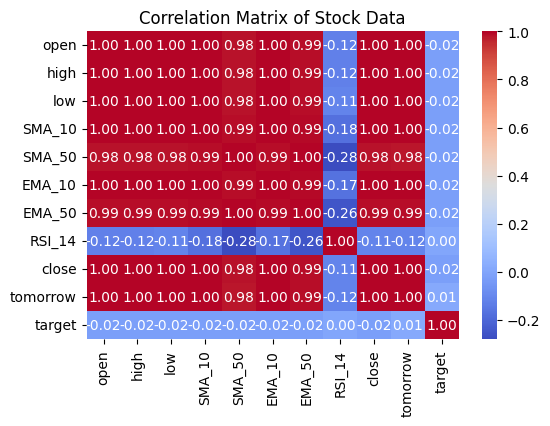

In [18]:
# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Data')
plt.show()

In [19]:
del stock_data_filtered["RSI_14"]
del stock_data_filtered["target"]

stock_data_filtered

,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,close,tomorrow
Date,,,,,,,,,
2019-03-14,44.149023,44.197040,43.827329,42.529270,39.632642,42.745325,40.479822,44.108212,44.681984
2019-03-15,44.377097,44.972471,44.110618,42.796949,39.771280,43.097445,40.644613,44.681984,45.138130
2019-03-18,44.605173,45.226955,44.602769,43.089116,39.994245,43.468479,40.820829,45.138130,44.780418
2019-03-19,45.217349,45.370994,44.633975,43.353194,40.181035,43.707013,40.976107,44.780418,45.171738
2019-03-20,44.708399,45.491032,44.348293,43.680652,40.377229,43.973327,41.140642,45.171738,46.835415
...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,215.026291,215.036933,215.388954,212.398070,217.529999,221.270004
2024-08-13,219.009995,221.889999,219.009995,215.298587,215.621778,216.458236,212.745989,221.270004,221.720001
2024-08-14,220.570007,223.029999,219.699997,215.288263,216.180065,217.414921,213.097911,221.720001,224.720001


In [20]:
# Separate the last row (used for prediction)
last_row = stock_data_filtered.iloc[-1:]

# Remove the last row from the dataframe
stock_data_filtered = stock_data_filtered.iloc[:-1]

stock_data_filtered

,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,close,tomorrow
Date,,,,,,,,,
2019-03-14,44.149023,44.197040,43.827329,42.529270,39.632642,42.745325,40.479822,44.108212,44.681984
2019-03-15,44.377097,44.972471,44.110618,42.796949,39.771280,43.097445,40.644613,44.681984,45.138130
2019-03-18,44.605173,45.226955,44.602769,43.089116,39.994245,43.468479,40.820829,45.138130,44.780418
2019-03-19,45.217349,45.370994,44.633975,43.353194,40.181035,43.707013,40.976107,44.780418,45.171738
2019-03-20,44.708399,45.491032,44.348293,43.680652,40.377229,43.973327,41.140642,45.171738,46.835415
...,...,...,...,...,...,...,...,...,...
2024-08-09,211.854792,216.529374,211.724938,215.072060,214.507709,214.913167,212.188604,215.990005,217.529999
2024-08-12,216.070007,219.509995,215.600006,215.026291,215.036933,215.388954,212.398070,217.529999,221.270004
2024-08-13,219.009995,221.889999,219.009995,215.298587,215.621778,216.458236,212.745989,221.270004,221.720001


In [21]:
last_row

,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,close,tomorrow
Date,,,,,,,,,
2024-08-16,223.919998,226.827103,223.650101,216.600429,217.401388,220.083461,214.046281,226.115005,NaN


In [22]:
# format using minmaxscalar 
#-------------------------------------

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create the scaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the entire dataset, including the 'tomorrow' column
stock_data_scaled = scaler.fit_transform(stock_data_filtered)

# Convert the scaled data back to a DataFrame
stock_data_scaled_df = pd.DataFrame(stock_data_scaled, columns=stock_data_filtered.columns, index=stock_data_filtered.index)

# Rounding min and max values to a reasonable precision
min_value = np.round(stock_data_scaled.min(), 5)
max_value = np.round(stock_data_scaled.max(), 5)

# Check the min and max values for the entire scaled data
print("Scaled Data - Min:", min_value)
print("Scaled Data - Max:", max_value)



Scaled Data - Min: 0.0
Scaled Data - Max: 1.0


In [23]:
stock_data_scaled

array([[9.63665929e-03, 6.79699977e-03, 1.45633438e-02, ...,
        0.00000000e+00, 1.21572088e-02, 1.51334534e-02],
       [1.08127422e-02, 1.07924641e-02, 1.60404506e-02, ...,
        9.52140700e-04, 1.51334534e-02, 1.74995532e-02],
       [1.19888375e-02, 1.21037110e-02, 1.86065974e-02, ...,
        1.97029778e-03, 1.74995532e-02, 1.56440479e-02],
       ...,
       [9.11324076e-01, 9.22372751e-01, 9.27990034e-01, ...,
        9.95333262e-01, 9.31122309e-01, 9.33456511e-01],
       [9.19368432e-01, 9.28246680e-01, 9.31587802e-01, ...,
        9.97366626e-01, 9.33456511e-01, 9.49017966e-01],
       [9.40149509e-01, 9.40200684e-01, 9.47543053e-01, ...,
        1.00000000e+00, 9.49017966e-01, 9.56254065e-01]])

In [24]:
# Preparing the data to train the LSTM model
# --------------------------------------------------------

# Initialize an empty list to store our input sequences
input_sequences = []

# Number of days to look back in the past to make predictions
look_back_days = 90 

# These columns include open, high, low, SMA_10, SMA_50, EMA_10, EMA_50, close
for feature_index in range(8):  # 8 features (excluding 'tomorrow')
    input_sequences.append([])  # Create a new sublist for each feature
    
    # Loop over each day in the dataset, starting from the 90th day
    for current_day in range(look_back_days, stock_data_scaled.shape[0]):
        # For each day, take the last 90 days of data for that feature and add it to input_sequences
        input_sequences[feature_index].append(stock_data_scaled[current_day-look_back_days:current_day, feature_index])

# Convert list to a numpy array
input_sequences = np.array(input_sequences)

# Reshape to be (samples, time_steps, features) for LSTM
x_feature_reshape = np.moveaxis(input_sequences, [0], [2])

# Prepare the target variable ('tomorrow')
y_target_reshape = np.array(stock_data_scaled[look_back_days:, -1])  # Target column is 'tomorrow'

# Reshape y_target to be a 2D array (required for LSTM)
y_target_reshaped = np.reshape(y_target_reshape, (len(y_target_reshape), 1))

print("training feature reshape")
print("---------------------------------------")
print(x_feature_reshape)
print(x_feature_reshape.shape)

print("target feature reshape")
print("---------------------------------------")
print(y_target_reshape)
print(y_target_reshape.shape)

training feature reshape
---------------------------------------
[[[9.63665929e-03 6.79699977e-03 1.45633438e-02 ... 0.00000000e+00
   0.00000000e+00 1.21572088e-02]
  [1.08127422e-02 1.07924641e-02 1.60404506e-02 ... 1.90084253e-03
   9.52140700e-04 1.51334534e-02]
  [1.19888375e-02 1.21037110e-02 1.86065974e-02 ... 3.90378764e-03
   1.97029778e-03 1.74995532e-02]
  ...
  [3.54919494e-02 3.47191887e-02 4.20075312e-02 ... 3.37565097e-02
   3.97079343e-02 4.04525374e-02]
  [3.77164255e-02 3.54890886e-02 4.03237381e-02 ... 3.35844789e-02
   4.00412429e-02 3.66148081e-02]
  [3.50569993e-02 3.63955421e-02 4.18944514e-02 ... 3.45388974e-02
   4.06143040e-02 4.24026661e-02]]

 [[1.08127422e-02 1.07924641e-02 1.60404506e-02 ... 1.90084253e-03
   9.52140700e-04 1.51334534e-02]
  [1.19888375e-02 1.21037110e-02 1.86065974e-02 ... 3.90378764e-03
   1.97029778e-03 1.74995532e-02]
  [1.51455851e-02 1.28458828e-02 1.87693075e-02 ... 5.19146461e-03
   2.86747552e-03 1.56440479e-02]
  ...
  [3.7716425

In [25]:
# Splitting into train and test sets
# --------------------------------------------------------

# Now, split the data into training and testing sets

# Define the split limit at 80% of the dataset length
split_limit = int(len(x_feature_reshape) * 0.8)

# Split the input sequences into training and testing sets
X_train, X_test = x_feature_reshape[:split_limit], x_feature_reshape[split_limit:]

# Split the target values into training and testing sets
y_train, y_test = y_target_reshaped[:split_limit], y_target_reshaped[split_limit:]

# Print the shapes of the training and testing sets to ensure the split was successful
print("X_train shape:", X_train.shape)  # Shape of the training set inputs
print("X_test shape:", X_test.shape)    # Shape of the testing set inputs
print("y_train shape:", y_train.shape)  # Shape of the training set targets
print("y_test shape:", y_test.shape)    # Shape of the testing set targets

# Output the training targets to verify the split
print("Training targets:", y_train)

X_train shape: (1020, 90, 8)
X_test shape: (256, 90, 8)
y_train shape: (1020, 1)
y_test shape: (256, 1)
Training targets: [[0.04421533]
 [0.04215265]
 [0.04305272]
 ...
 [0.7100115 ]
 [0.70171408]
 [0.70058018]]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)

Epoch 1/50
32/32 [==============================] - 8s 98ms/step - loss: 0.0218 - val_loss: 0.0073
Epoch 2/50
32/32 [==============================] - 2s 74ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 3/50
32/32 [==============================] - 2s 75ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 4/50
32/32 [==============================] - 2s 72ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 5/50
32/32 [==============================] - 2s 72ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 6/50
32/32 [==============================] - 2s 76ms/step - loss: 9.6639e-04 - val_loss: 0.0019
Epoch 7/50
32/32 [==============================] - 2s 75ms/step - loss: 9.0962e-04 - val_loss: 0.0014
Epoch 8/50
32/32 [==============================] - 2s 72ms/step - loss: 8.8666e-04 - val_loss: 0.0015
Epoch 9/50
32/32 [==============================] - 2s 78ms/step - loss: 8.4902e-04 - val_loss: 0.0016
Epoch 10/50
32/32 [==============================] - 2s 69ms/step - loss: 8.4142e-04 - val_lo

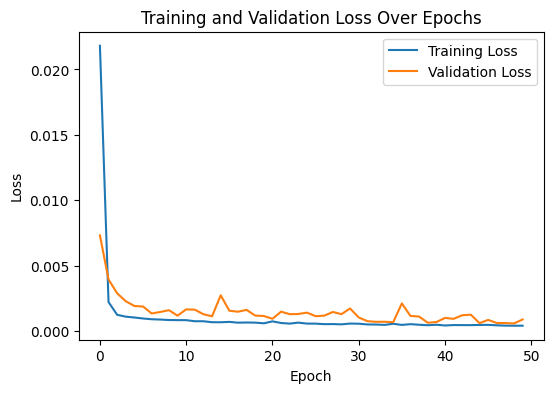

In [27]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a new figure
plt.figure(figsize=(6, 4))

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()


8/8 [==============================] - 0s 29ms/step
Mean Squared Error (MSE): 0.0008484390633401198
Mean Absolute Error (MAE): 0.022485610322052017
R-squared (R²): 0.8847958689255204


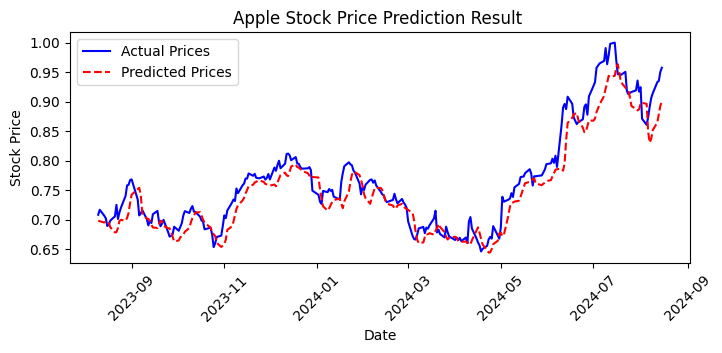

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Predict on the test data
y_pred_scaled = model.predict(X_test)

# Reshape y_pred_scaled to match the shape of y_test for evaluation
y_pred_scaled = np.reshape(y_pred_scaled, (len(y_pred_scaled),))

# Assuming 'y_target' was scaled similarly to the features (e.g., MinMaxScaler):
# Create a reverse scaler for the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(y_target_reshaped.reshape(-1, 1))

# Inverse transform predictions and actual test targets
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# visualize the predictions vs actual values
# Assuming you have the test date indices saved
test_dates = stock_data_filtered.index[-len(y_test_actual):]  # Get the corresponding test dates
# Create a figure for plotting
plt.figure(figsize=(8, 3))
# Plot the actual stock prices using the saved test dates as the x-axis
plt.plot(test_dates, y_test_actual, label='Actual Prices', color='blue')
# Plot the predicted stock prices using the same test dates as the x-axis
plt.plot(test_dates, y_pred, label='Predicted Prices', color='red', linestyle='--')  # Dashed line for predictions
# Set plot title and labels
plt.title('Apple Stock Price Prediction Result ')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Assuming 'y_target_reshaped' is the target data used for scaling
# Fit the scaler on the original target data
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(stock_data_filtered[['tomorrow']].values)  # Fit scaler on the original 'tomorrow' values

# Extract the test data indices
test_indices = stock_data_filtered.index[-len(X_test):]

# Create a DataFrame for the test data
test_df = stock_data_filtered.loc[test_indices].copy()

# Predict on the test data
y_pred_scaled = model.predict(X_test)

# Reshape y_pred_scaled to match the shape of y_test for evaluation
y_pred_scaled = np.reshape(y_pred_scaled, (len(y_pred_scaled),))

# Inverse transform predictions to get them back to the original scale
# Use the scaler fitted on the original 'tomorrow' values
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Add the predictions as a new column to the DataFrame
test_df['Predicted'] = y_pred

# Print the first few rows to verify
test_df


8/8 [==============================] - 0s 28ms/step


,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,close,tomorrow,Predicted
Date,,,,,,,,,,
2023-08-10,178.325446,179.587281,176.457550,185.642082,186.226099,183.133927,184.144087,176.825165,176.884872,174.904922
2023-08-11,176.417279,177.710649,175.651195,183.873540,186.241600,181.997735,183.859412,176.884872,178.546371,174.706223
2023-08-14,177.063952,178.775196,176.407308,182.209547,186.233897,181.370215,183.651057,178.546371,176.546585,174.282288
2023-08-15,177.969313,178.566249,176.148628,180.429037,186.169109,180.493191,183.372451,176.546585,175.671082,174.634018
2023-08-16,176.228228,177.631038,175.601431,178.862027,186.114034,179.616444,183.070436,175.671082,173.114166,174.633789
...,...,...,...,...,...,...,...,...,...,...
2024-08-09,211.854792,216.529374,211.724938,215.072060,214.507709,214.913167,212.188604,215.990005,217.529999,205.200302
2024-08-12,216.070007,219.509995,215.600006,215.026291,215.036933,215.388954,212.398070,217.529999,221.270004,207.749680
2024-08-13,219.009995,221.889999,219.009995,215.298587,215.621778,216.458236,212.745989,221.270004,221.720001,210.452225


In [30]:
stock_data_filtered

,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,close,tomorrow
Date,,,,,,,,,
2019-03-14,44.149023,44.197040,43.827329,42.529270,39.632642,42.745325,40.479822,44.108212,44.681984
2019-03-15,44.377097,44.972471,44.110618,42.796949,39.771280,43.097445,40.644613,44.681984,45.138130
2019-03-18,44.605173,45.226955,44.602769,43.089116,39.994245,43.468479,40.820829,45.138130,44.780418
2019-03-19,45.217349,45.370994,44.633975,43.353194,40.181035,43.707013,40.976107,44.780418,45.171738
2019-03-20,44.708399,45.491032,44.348293,43.680652,40.377229,43.973327,41.140642,45.171738,46.835415
...,...,...,...,...,...,...,...,...,...
2024-08-09,211.854792,216.529374,211.724938,215.072060,214.507709,214.913167,212.188604,215.990005,217.529999
2024-08-12,216.070007,219.509995,215.600006,215.026291,215.036933,215.388954,212.398070,217.529999,221.270004
2024-08-13,219.009995,221.889999,219.009995,215.298587,215.621778,216.458236,212.745989,221.270004,221.720001


In [31]:
last_row

,open,high,low,SMA_10,SMA_50,EMA_10,EMA_50,close,tomorrow
Date,,,,,,,,,
2024-08-16,223.919998,226.827103,223.650101,216.600429,217.401388,220.083461,214.046281,226.115005,NaN


In [32]:
# making new prediction on the last row 
# ----------------------------------------- 

# Ensure the feature scaler is fitted on the original training data
# Feature scaler for the data used for training
feature_scaler = MinMaxScaler(feature_range=(0, 1))
feature_scaler.fit(stock_data_filtered[['open', 'high', 'low', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'close']])

# Transform the last_row data
last_row_scaled = feature_scaler.transform(last_row[['open', 'high', 'low', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'close']])

# Prepare the data for prediction
# As we need a sequence of look_back_days, repeat the last_row_scaled to form the sequence
look_back_days = 90  # Same look_back_days used in training
input_sequence = np.array([last_row_scaled] * look_back_days)

# Reshape to be (samples, time_steps, features)
input_sequence = np.reshape(input_sequence, (1, look_back_days, last_row_scaled.shape[1]))

# Predict the 'tomorrow' value
predicted_scaled = model.predict(input_sequence)

# Reshape prediction to match the scaler input shape
predicted_scaled = np.reshape(predicted_scaled, (1,))

# Create a target scaler fitted on the 'tomorrow' column of stock_data_filtered
# Fit the scaler on non-NaN values of 'tomorrow'
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(stock_data_filtered[['tomorrow']].dropna().values.reshape(-1, 1))

# Inverse transform the prediction
predicted = target_scaler.inverse_transform(predicted_scaled.reshape(-1, 1))

# Print the predicted value
print(f"Predicted 'tomorrow' value for {last_row.index[0]}: {predicted[0][0]}")

1/1 [==============================] - 1s 1s/step
Predicted 'tomorrow' value for 2024-08-16 00:00:00: 218.33230590820312


In [33]:
# Assuming your DataFrame is named stock_data_filtered
row = stock_data_filtered.loc['2024-08-15']
print(row)

open        224.600006
high        225.350006
low         222.759995
SMA_10      215.949509
SMA_50      216.791959
EMA_10      218.743117
EMA_50      213.553680
close       224.720001
tomorrow    226.115005
Name: 2024-08-15 00:00:00, dtype: float64
